# Save for Xmas - Post Scoring

In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, './helper')
sys.path.insert(0, '/home/jovyan/a01_repos/wx_tools')
sys.path.insert(0, '/home/jovyan/a01_repos/joe_utils')

import sfx_config as cfg
import wx_utils as utl
import wx_visualise as viz
import UDF_Validation as vld
import UDF_Visualisation as viz2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
importlib.reload(sys.modules['wx_utils'])
importlib.reload(sys.modules['sfx_config'])

<module 'wx_utils' from '/home/jovyan/a01_repos/wx_tools/wx_utils.py'>

<module 'sfx_config' from './helper/sfx_config.py'>

## Paths

In [5]:
path_local_scored = f'{cfg.PATH_LOCAL_DATA}/scored_20200705.parquet'

In [6]:
# Test set
path_gcp_test = f'{cfg.PATH_GCP_MODELS}/propensity/2020-07-13/scoring/scored_T.parquet'
path_local_test = f'{cfg.PATH_LOCAL_DATA}/test_20200705.parquet'
# utl.copy_gsutil(path_gcp_test, path_local_test)

## Validate Test Set

In [7]:
test0 = pd.read_parquet(path_local_test)
test0.shape
test0.head(2)

(229068, 133)

crn      ref_dt  target  sample_weight  f0_age  \
6   1100000000006352031  2020-05-31     0.0       4.857365    47.0   
21  1100000000117191028  2020-05-31     0.0       4.857365    36.0   

    f0_all_loc__7eleven_walktime  f0_all_loc__bp_drvtime  \
6                          59.48                   11.65   
21                          0.00                   14.70   

    f0_all_loc__caltex_walktime  f0_all_loc__colesexpress_walktime  \
6                     38.630001                          58.849998   
21                    29.230000                          31.730000   

    f0_all_loc__costco_walktime  f0_all_loc__enhance_walktime  \
6                    732.469971                           0.0   
21                   131.380005                           0.0   

    f0_all_loc__speedway_drvtime  f0_all_loc__speedway_walktime  \
6                            0.0                            0.0   
21                           0.0                            0.0   

    f0_all_loc__united_walktime  f0_bigw_txn_flx_104wk__avg_basket_amt  \
6                    407.480011                               0.000000   
21                    61.720001                              27.937243   

    f0_bigw_txn_flx_104wk__avg_weekly_spend_amt  \
6                                      0.000000   
21                                    16.654896   

    f0_bigw_txn_flx_16wk__avg_weekly_spend_amt   f0_affluence  f0_age_band  \
6                                     0.000000      1. budget  6. [45, 55)   
21                                   12.140909  2. mainstream  5. [35, 45)   

   f0_bigw_txn_flx_16wk__trn_weeks_shopped f01_grouparea_code f01_mem_gender  \
6                                      nan               none              m   
21                                     7.0                 06              f   

   f01_mem_lifestsge_current f01_mem_resi_address_state  \
6                                                   qld   
21            young families                         sa   

   f01_mem_segment_bpm_now f01_mem_segment_cell_current  \
6                   budget                     inactive   
21              mainstream                      hvhfmas   

   f01_mem_segment_cell_previous    f01_store_cluster_desc  \
6                         lapsed                      none   
21                        hvhfhs  mainstream one stop shop   

   f02_flx_onln_txn_no f04_scn_trn_weeks_shopped_8w f07_card_number_total  \
6                  nan                          nan                   1.0   
21                 0.0                          9.0                   1.0   

   f21_num_coles_within_5km f21_num_comp_within_5km f21_num_iga_within_5km  \
6                       0.0                     5.0                    4.0   
21                      nan                     nan                    nan   

   f23_cna_camp_redeem_times_8w f23_ncp_camp_redeem_rate_send_8w  \
6                           nan                              nan   
21                          nan                              nan   

   f25_sg_redeem_times f27_email_mp_8w f27_os_mp_8w f0_gender  \
6                  nan     unspecified  unspecified         m   
21                 0.0          iphone          ios         f   

          f0_lifestage f0_macro_segment_curr f0_macro_segment_prev  \
6                 none          02. inactive                lapsed   
21  04. young families             11. hvmed                hvhigh   

   f0_postcode f0_preferred_store f0_tenure_band  \
6         4551                        5. (5, 10]   
21       other              other      3. (2, 3]   

    f0_bigw_txn_flx_26wk__range_qty  \
6                               0.0   
21                             16.0   

    f0_bigw_txn_flx_52wk__median_spend_mrcds_102  \
6                                       0.000000   
21                                      3.181818   

    f0_bigw_txn_flx_52wk__pcntl_weekly_spend_amt  \
6                                           47.0   
21      

In [8]:
cols = ['crn', 'pred', 'target', 'sample_weight']
test = test0[cols]
test['target_wgtd'] = test['target'] * test['sample_weight']
test.describe().T

/home/jovyan/my-conda-envs/melon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count      mean       std       min       25%       50%  \
pred           229068.0  0.044245  0.100739  0.000357  0.006206  0.015423   
target         229068.0  0.129272  0.335501  0.000000  0.000000  0.000000   
sample_weight  229068.0  4.358717  1.294150  1.000000  4.857365  4.857365   
target_wgtd    229068.0  0.129272  0.335501  0.000000  0.000000  0.000000   

                    75%       max  
pred           0.041665  0.998003  
target         0.000000  1.000000  
sample_weight  4.857365  4.857365  
target_wgtd    0.000000  1.000000

In [9]:
# Sort by prediction
test = (
    test.sort_values(by='pred', ascending=False)
    .reset_index(drop=True)
)

In [10]:
# Aggregate
quantum_pct = 0.01
test_agg, q_vol, q_pct, _ = utl.aggregate_metrics(
    test, ['target', 'pred'], quantum_pct,
)

In [11]:
# Aggregate: target weighted average
test_agg_sum = utl.aggregate_metrics(
    test, ['target_wgtd', 'sample_weight'], quantum_pct,
    stat='sum'
)[0]
test_agg_sum['target_wgtd_avg'] = test_agg_sum['target_wgtd'] / test_agg_sum['sample_weight']

In [12]:
test_agg = test_agg.merge(test_agg_sum['target_wgtd_avg'], left_index=True, right_index=True)

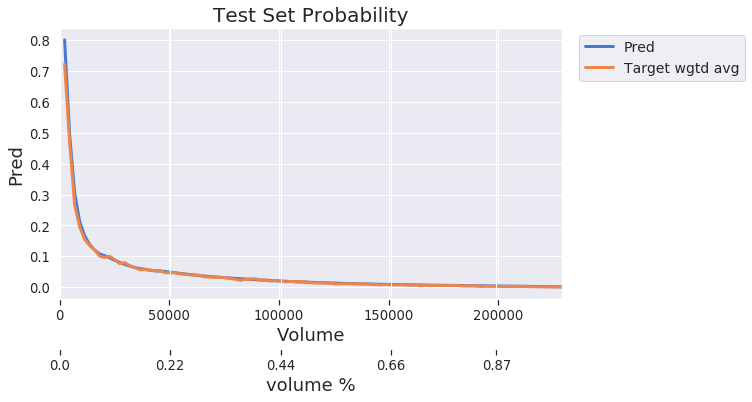

In [13]:
f, ax = viz.plot_multi_metrics(
    test_agg, x='volume', metrics=['pred', 'target_wgtd_avg'],
    title='Test Set Probability'
)
viz.plot_x_volume_to_percent(ax, q_vol, q_pct)

## Downsample Positive Class

In [139]:
test['sample_weight'].value_counts()
dsmpl_wgt = 1 / test['sample_weight'].max()
dsmpl_wgt

4.857365    199456
1.000000     29612
Name: sample_weight, dtype: int64

0.20587293728183903

In [140]:
cond = test['target'] == 1
pos_dsmpl = test[cond].sample(frac=dsmpl_wgt)
pos_dsmpl.shape

(6096, 5)

In [141]:
cond = test['target'] == 0
test_dsmpl = pd.concat((
    pos_dsmpl, test[cond]
))
test_dsmpl.shape

(205552, 5)

In [142]:
test_dsmpl.sort_values(by='pred', ascending=False, inplace=True)
test_dsmpl = test_dsmpl.reset_index(drop=True)

In [143]:
test_dsmpl.describe().T

count      mean       std       min       25%       50%  \
pred           205552.0  0.031193  0.064087  0.000357  0.005657  0.013184   
target         205552.0  0.029657  0.169639  0.000000  0.000000  0.000000   
sample_weight  205552.0  4.742968  0.654359  1.000000  4.857365  4.857365   
target_wgtd    205552.0  0.029657  0.169639  0.000000  0.000000  0.000000   

                    75%       max  
pred           0.033714  0.997500  
target         0.000000  1.000000  
sample_weight  4.857365  4.857365  
target_wgtd    0.000000  1.000000

Text(100000.0, 0.07, '0.0297')

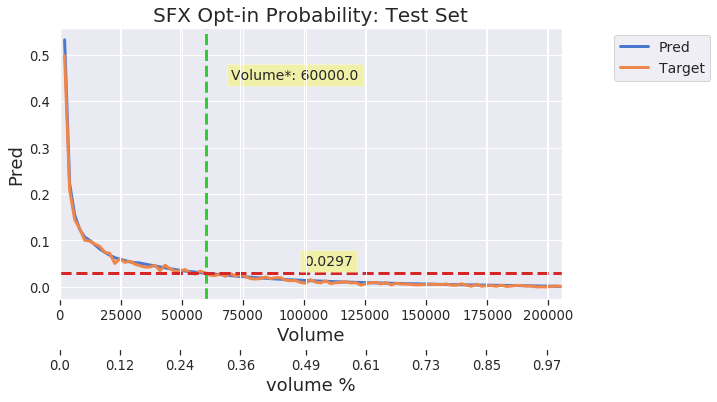

In [144]:
# Aggregate
quantum_pct = 0.01
dsmpl_agg, q_vol, q_pct, _ = utl.aggregate_metrics(
    test_dsmpl, ['target', 'pred'], quantum_pct,
)

f, ax = viz.plot_multi_metrics(
    dsmpl_agg, x='volume', metrics=['pred', 'target'],
    title='SFX Opt-in Probability: Test Set',
    x_opt=60e3
)
viz.plot_x_volume_to_percent(ax, q_vol, q_pct)

hline = test_dsmpl['target'].mean()
ax.axhline(y=hline, c='tab:red', ls='--', linewidth=3)
ax.text(
    x=100e3, y=0.07, s=np.round(hline,4),
    fontsize=14, verticalalignment='top',
    bbox=dict(facecolor='yellow', alpha=0.3)
)

Text(15000.0, 0.07, '0.0297')

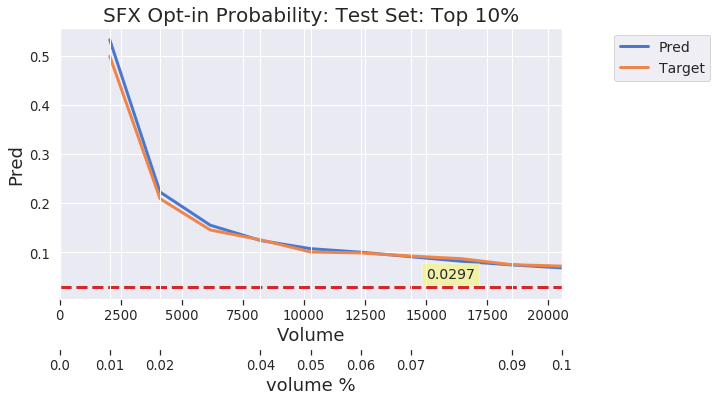

In [147]:
# Top 15%
cond = dsmpl_agg['volume_pct'] <= 0.1
x = dsmpl_agg[cond]

f, ax = viz.plot_multi_metrics(
    x, x='volume', metrics=['pred', 'target'],
    title='SFX Opt-in Probability: Test Set: Top 10%',
)
viz.plot_x_volume_to_percent(ax, q_vol, q_pct)

hline = test_dsmpl['target'].mean()
ax.axhline(y=hline, c='tab:red', ls='--', linewidth=3)
ax.text(
    x=15e3, y=0.07, s=np.round(hline,4),
    fontsize=14, verticalalignment='top',
    bbox=dict(facecolor='yellow', alpha=0.3)
)

In [21]:
dsmpl_agg.head(15)
# test_dsmpl.head(1000)['target'].mean()
# test_dsmpl.head(2055)['target'].mean()

volume               quantum    target      pred  volume_pct
0     2055     (-0.001, 2055.51]  0.486868  0.522653        0.01
1     4110    (2055.51, 4111.02]  0.208171  0.221161        0.02
2     6165    (4111.02, 6166.53]  0.141606  0.154539        0.03
3     8220    (6166.53, 8222.04]  0.131323  0.123837        0.04
4    10275   (8222.04, 10277.55]  0.106569  0.107318        0.05
5    12330  (10277.55, 12333.06]  0.097763  0.100223        0.06
6    14385  (12333.06, 14388.57]  0.102190  0.091033        0.07
7    16440  (14388.57, 16444.08]  0.085603  0.081883        0.08
8    18495  (16444.08, 18499.59]  0.078345  0.074533        0.09
9    20550   (18499.59, 20555.1]  0.068580  0.068512        0.10
10   22605   (20555.1, 22610.61]  0.052555  0.063028        0.11
11   24660  (22610.61, 24666.12]  0.059825  0.059664        0.12
12   26715  (24666.12, 26721.63]  0.052555  0.057010        0.13
13   28770  (26721.63, 28777.14]  0.057393  0.053781        0.14
14   30825  (28777.14, 30832.65]  0.051582  0.052409        0.15

## Scored Audience (to send)

In [7]:
scored = pd.read_parquet(path_local_scored)
scored.shape
scored.head(2)

(4555057, 12)

ref_dt                  crn macro_segment_curr      affluence  \
0  2020-07-05  1000000000000001690         12. HVHIGH  2. MAINSTREAM   
1  2020-07-05  1000000000000012956          11. HVMED      1. BUDGET   

                   lifestage spend_8wk gender  age     age_band  tenure  \
0  03. OLDER SINGLES/COUPLES    130.39      F   61  7. [55, 65)  4682.0   
1         06. OLDER FAMILIES    141.43   None   56  7. [55, 65)  4661.0   

  tenure_band     score  
0     6. > 10  0.038080  
1     6. > 10  0.058885

In [23]:
scored[['score']].describe().T

count     mean      std       min       25%       50%       75%  \
score  4555057.0  0.03362  0.06005  0.000358  0.007028  0.015079  0.034478   

            max  
score  0.996016

## Allocation

In [8]:
# Check known crns
crns = [
    '1100000000095370490', # Jen
    '1100000000002204029', # Winnie
    '3300000000002837429', # Joe
    '1000000000001705548', # Mum
]
cond = scored['crn'].isin(crns)
scored[cond]

ref_dt                  crn macro_segment_curr   affluence  \
17518  2020-07-05  1000000000001705548         12. HVHIGH  3. PREMIUM   
19829  2020-07-05  1100000000095370490         08. MVMEDA  3. PREMIUM   
22143  2020-07-05  3300000000002837429            03. LOW  3. PREMIUM   

                        lifestage spend_8wk gender  age     age_band  tenure  \
17518   03. OLDER SINGLES/COUPLES    132.94   None   62  7. [55, 65)  4408.0   
19829   01. YOUNG SINGLES/COUPLES     67.32      F   24  2. [20, 25)  2155.0   
22143  02. MIDAGE SINGLES/COUPLES      1.36      M   31  4. [30, 35)   232.0   

      tenure_band     score  
17518     6. > 10  0.002219  
19829   4. (3, 5]  0.003326  
22143   1. [0, 1]  0.007419

## Set Random Group

In [9]:
# Random send audience volume
n_rand = 100e3

rand_grp = utl.select_random_group(
    scored, n_rand, random_state=cfg.RAND_SEED
)
rand_grp.shape

(100000, 12)

In [10]:
# Model-selection
model_grp = scored.merge(
    rand_grp['crn'],
    on='crn', how='left',
    indicator=True
)

cond = model_grp['_merge'] == 'left_only'
model_grp = model_grp[cond]
model_grp.drop(columns=['_merge'], inplace=True)

In [11]:
model_grp.shape

(4455057, 12)

### Lift

In [12]:
model_grp = (
    model_grp.sort_values(by='score', ascending=False)
    .reset_index(drop=True)
)

In [13]:
# Aggregate
quantum_pct = 0.01
agg, q_vol, q_pct, _ = utl.aggregate_metrics(
    model_grp, ['score'], quantum_pct,
)

Text(2000000.0, 0.07, '0.0336')

Text(600000.0, 0.3, '600000.0')

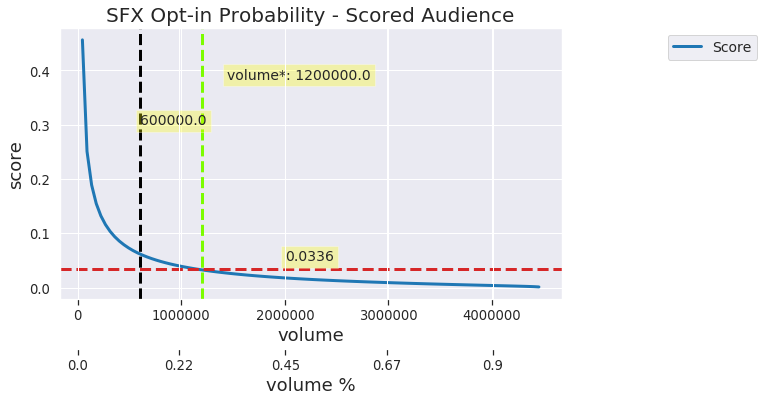

In [14]:
f, ax3, ax4 = viz.plot_dual_metrics(
    agg, x='volume', y1='score', y2=None,
    linewidth=3, title='SFX Opt-in Probability - Scored Audience',
    x_opt=1.2e6,
)
viz.plot_x_volume_to_percent(ax3, q_vol, q_pct)

hline = scored['score'].mean()
ax3.axhline(y=hline, c='tab:red', ls='--', linewidth=3)
ax3.text(
    x=2e6, y=0.07, s=np.round(hline,4),
    fontsize=14, verticalalignment='top',
    bbox=dict(facecolor='yellow', alpha=0.3)
)

# Cut-off
vline = 600e3
ax3.axvline(x=vline, c='black', ls='--', linewidth=3)
ax3.text(
    x=vline, y=0.3, s=vline,
    fontsize=14, horizontalalignment='left',
    bbox=dict(facecolor='yellow', alpha=0.3)
)

### Prediction Stats by Send Category

In [16]:
send_model = model_grp.head(np.int(vline))
send_model['send_catg'] = 'M'
rand_grp['send_catg'] = 'R'

send = pd.concat((send_model, rand_grp))
send.shape

/home/jovyan/my-conda-envs/melon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(700000, 13)

In [17]:
send.groupby('send_catg').agg({
    'crn': 'count',
    'score': 'mean',
})

crn     score
send_catg                  
M          600000  0.140651
R          100000  0.033399

In [38]:
send.head(2)

ref_dt                  crn macro_segment_curr  affluence  \
0  2020-07-05  1100000000001558870         12. HVHIGH  1. BUDGET   
1  2020-07-05  3300000000002321704         12. HVHIGH  1. BUDGET   

                    lifestage spend_8wk gender  age     age_band  tenure  \
0  02. MIDAGE SINGLES/COUPLES    217.51      M   31  4. [30, 35)  4002.0   
1   01. YOUNG SINGLES/COUPLES    422.20      F   25  3. [25, 30)   401.0   

  tenure_band     score send_catg  
0  5. (5, 10]  0.996016         M  
1   1. [0, 1]  0.995875         M

In [124]:
importlib.reload(sys.modules['wx_utils'])
importlib.reload(sys.modules['sfx_config'])

<module 'wx_utils' from '/home/jovyan/a01_repos/wx_tools/wx_utils.py'>

<module 'sfx_config' from './helper/sfx_config.py'>

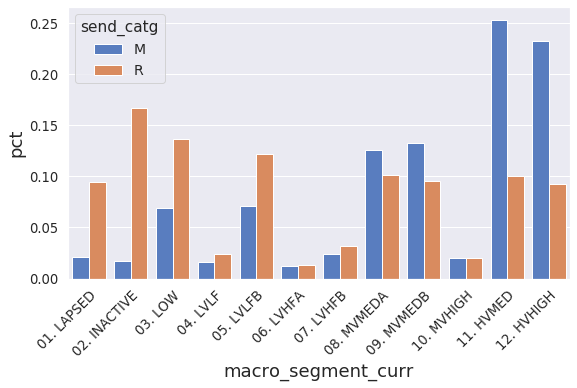

In [136]:
macro_segment_curr = utl.get_count_percent(send, ['send_catg', 'macro_segment_curr'], 'send_catg')
ax = sns.barplot(x='macro_segment_curr', y='pct', hue='send_catg', data=macro_segment_curr)
a = plt.setp(
    ax.get_xticklabels(), rotation=45, ha="right",
    rotation_mode="anchor"
)

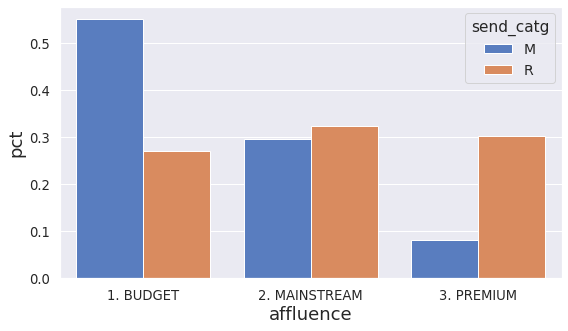

In [130]:
affluence = utl.get_count_percent(send, ['send_catg', 'affluence'], 'send_catg')
ax = sns.barplot(x='affluence', y='pct', hue='send_catg', data=affluence)

In [133]:
lifestage = utl.get_count_percent(send, ['send_catg', 'lifestage'], 'send_catg')
ax = sns.barplot(x='lifestage', y='pct', hue='send_catg', data=lifestage)
a = plt.setp(
    ax.get_xticklabels(), rotation=45, ha="right",
    rotation_mode="anchor"
)

In [134]:
gender = utl.get_count_percent(send, ['send_catg', 'gender'], 'send_catg')
ax = sns.barplot(x='gender', y='pct', hue='send_catg', data=gender)